# Análise exploratória

* verifique qual é a quantidade total de exemplares emprestados por cada ano e plote um gráfico de linhas.
* Realizar uma análise em relação à visualização gerada.
* gere uma tabela com a quantidade total de exemplares emprestados por mês e descubra quais meses são os que possuem a maior quantidade de empréstimos realizados. Plote um gráfico de linhas.
* Traga suas análises em relação a quais meses poderiam ser as melhores opções(para férias dos colaborares).
* verifique quais foram os horários com maior quantidade de empréstimos ao longo de um dia inteiro.
* Plote um gráfico de barras e analise quais seriam os melhores horários para alocar as demais atividades que não sejam de atendimento ao usuário.

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# lendo o dataset

df = pd.read_parquet('../datasets/dados_tratados/dados_emprestimos_tratados.parquet')
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classificacao_cdu
0,9405484,2011010806,2017-01-13 07:22:40.736,2017-01-02 08:01:14.113,2017-01-30 07:05:05,2014035816,ALUNO DE GRADUAÇÃO,915480,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,689,Ciências aplicadas
1,9405492,2010040100,2017-01-31 07:31:36.902,2017-01-02 08:29:46.722,2017-02-21 13:16:33,20161011168,ALUNO DE PÓS-GRADUAÇÃO,1051275,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,651,Ciências aplicadas
2,9405496,2013105705,2017-01-31 07:31:36.843,2017-01-02 08:29:46.794,2017-02-21 13:15:46,20161011168,ALUNO DE PÓS-GRADUAÇÃO,1097159,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,380,Ciências sociais
3,9405504,H004983,2017-01-31 07:31:36.786,2017-01-02 08:46:42.991,2017-02-22 16:10:28,20161011168,ALUNO DE PÓS-GRADUAÇÃO,132715,Acervo Circulante,Biblioteca Setorial do Centro de Ciências Huma...,REGULAR,635,Ciências aplicadas
4,9405508,H011333,2017-01-31 07:31:36.658,2017-01-02 08:46:43.400,2017-02-22 16:10:40,20161011168,ALUNO DE PÓS-GRADUAÇÃO,180475,Acervo Circulante,Biblioteca Setorial do Centro de Ciências Huma...,REGULAR,632,Ciências aplicadas


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_emprestimo         int64         
 1   codigo_barras         object        
 2   data_renovacao        datetime64[ns]
 3   data_emprestimo       datetime64[ns]
 4   data_devolucao        datetime64[ns]
 5   matricula_ou_siape    object        
 6   tipo_vinculo_usuario  object        
 7   id_exemplar           int64         
 8   colecao               object        
 9   biblioteca            object        
 10  status_material       object        
 11  localizacao           int64         
 12  classificacao_cdu     object        
dtypes: datetime64[ns](3), int64(3), object(7)
memory usage: 205.6+ MB


In [4]:
# quantidade total de exemplares emprestados por cada ano
years = df['data_emprestimo'].dt.year

df_years_loans = df.groupby(years)['codigo_barras'].count().reset_index()
df_years_loans.columns = ['ano_emprestimo', 'quantidade_emprestimos']
df_years_loans.head()

,ano_emprestimo,quantidade_emprestimos
0,2010,161394
1,2011,196390
2,2012,221365
3,2013,234749
4,2014,219189


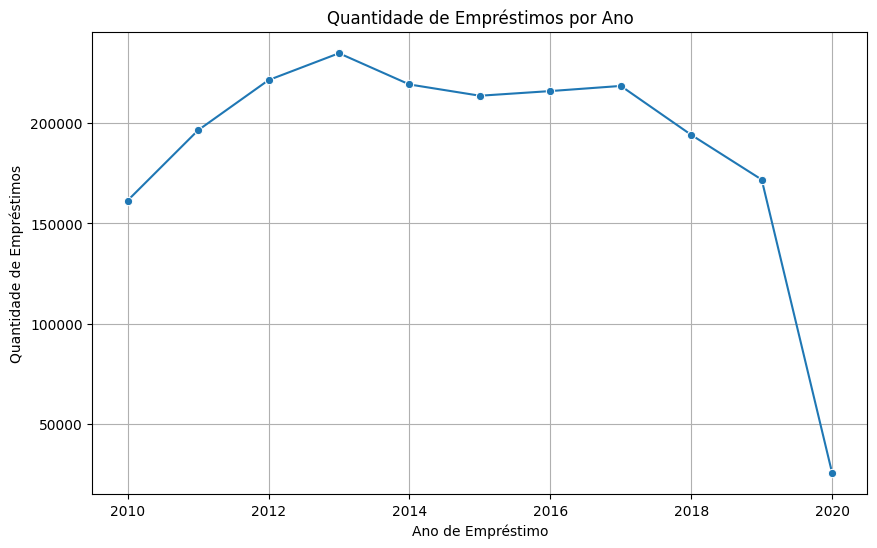

In [5]:
# Gráfico de linha da quantidade de empréstimos por ano
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_years_loans, x='ano_emprestimo', y='quantidade_emprestimos', marker='o')
plt.title('Quantidade de Empréstimos por Ano')
plt.xlabel('Ano de Empréstimo')
plt.ylabel('Quantidade de Empréstimos')
plt.grid()
plt.show()

### Análise do gráfico

#### De acordo com o gráfico plotado, é possível perceber uma redução drásticas do números de exemplares emprestado no ano de 2020. Provavelmente ocasionado pelo lock down da pandemia de COVID 19

In [6]:
# quantidade total de exemplares emprestados por mês

months = df['data_emprestimo'].dt.month

df_months_loans = df.groupby(months)['codigo_barras'].count().reset_index()
df_months_loans.columns = ['mes_emprestimo', 'quantidade_emprestimos']
#df_months_loans['mes_emprestimo'] = df_months_loans['mes_emprestimo'].dt.to_timestamp()
months_mapping = {
    1: 'Janeiro',
    2: 'Fevereiro', 
    3: 'Março', 
    4: 'Abril',
    5: 'Maio', 
    6: 'Junho', 
    7: 'Julho', 
    8: 'Agosto',
    9: 'Setembro', 
    10: 'Outubro', 
    11: 'Novembro', 
    12: 'Dezembro'
}

df_months_loans['mes_emprestimo'] = df_months_loans['mes_emprestimo'].map(months_mapping)
df_months_loans.head()

,mes_emprestimo,quantidade_emprestimos
0,Janeiro,67514
1,Fevereiro,210200
2,Março,252185
3,Abril,208725
4,Maio,202530


In [7]:
# Quantidade de empréstimos por mês em ordem decrescente

df_months_loans_sorted = df_months_loans.sort_values('quantidade_emprestimos', ascending=False)
df_months_loans_sorted


,mes_emprestimo,quantidade_emprestimos
2,Março,252185
7,Agosto,232793
1,Fevereiro,210200
3,Abril,208725
8,Setembro,208234
4,Maio,202530
9,Outubro,188410
10,Novembro,164222
5,Junho,138123
6,Julho,123790


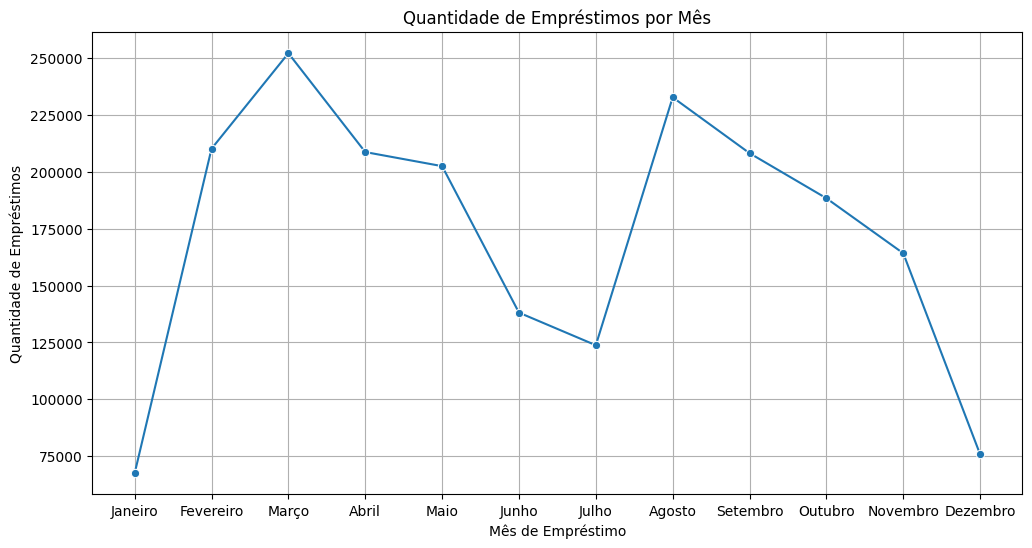

In [8]:
# Gráfico de linha da quantidade de empréstimos por mês
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_months_loans, x='mes_emprestimo', y='quantidade_emprestimos', marker='o')
plt.title('Quantidade de Empréstimos por Mês')
plt.xlabel('Mês de Empréstimo')
plt.ylabel('Quantidade de Empréstimos')
plt.grid()
plt.show()

#### Análise da dinámica de empréstimos de exemplares, por mês.

Considerando o gráfico e tabela da distribuição mensal de empréstimos, percebe-se que os meses de maior demanda são Agosto e Março, e os de menores demandas são Janeiro e Fevereiro

In [9]:
# Empréstimo por hora do dia

hours_loans = df.groupby(df['data_emprestimo'].dt.hour)['codigo_barras'].count().reset_index()
hours_loans.columns = ['hora_emprestimo', 'quantidade_emprestimos']
hours_loans

,hora_emprestimo,quantidade_emprestimos
0,0,17
1,6,14
2,7,18777
3,8,103416
4,9,131273
5,10,185839
6,11,180048
7,12,148754
8,13,126987
9,14,150876


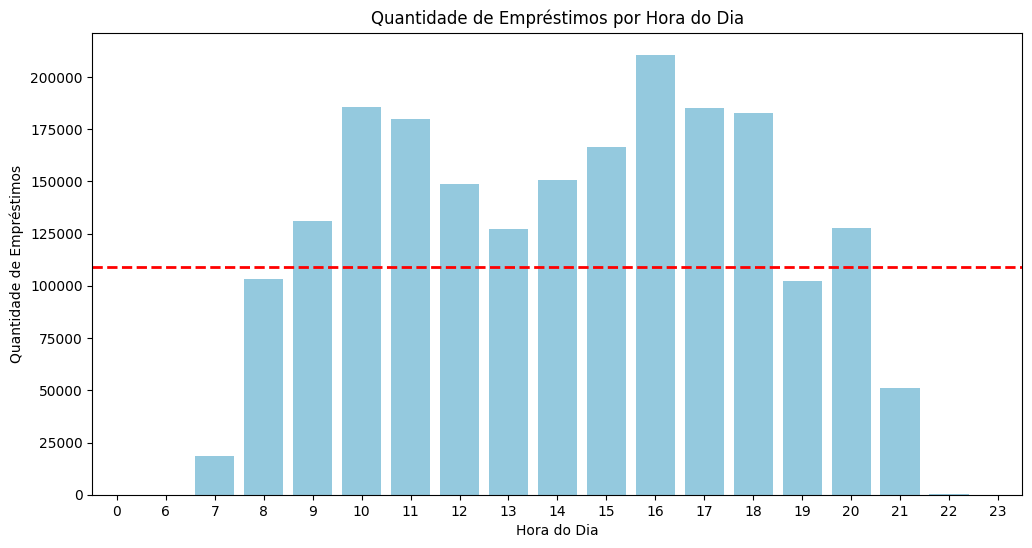

In [10]:
# Gráfico de barra da quantidade de empréstimos por hora do dia
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=hours_loans, x='hora_emprestimo', y='quantidade_emprestimos', color='skyblue')
plt.title('Quantidade de Empréstimos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Empréstimos')

# linha horizontal na média
# calcula média
mean_val = hours_loans['quantidade_emprestimos'].mean()
ax.axhline(mean_val, color='red', linestyle='--', linewidth=2)

plt.show()

#### Análise dos número de empréstimo ao longo do dia
Considerando os dados apresentado, a linha vermelha na horizontal representa a média do número de empréstimos realizados no dia. Dessa forma é recomendável que sejam atribuídas outras atividades além do atendimento ao público, antes das 9h e após as 18h